In [1]:
%pip install -r req.txt

Note: you may need to restart the kernel to use updated packages.


In [7]:
# Question 1

import numpy as np

from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()


# Q 1.1
def kmeans_clustering(data, k, max_iters=100):
    """
    Implements K-means clustering algorithm

    Parameters:
    data: numpy array of shape (n_samples, n_features)
    k: number of clusters
    max_iters: maximum number of iterations

    Returns:
    centroids: numpy array of shape (k, n_features)
    labels: numpy array of shape (n_samples,)
    """
    # Get dimensions of the data
    n_samples, n_features = data.shape

    # Initialize centroids randomly by selecting k random data points
    random_indices = np.random.choice(n_samples, k, replace=False)
    centroids = data[random_indices]

    for _ in range(max_iters):
        # Store old centroids to check for convergence
        old_centroids = centroids.copy()

        # Calculate distances between each point and all centroids
        distances = np.sqrt(((data[:, np.newaxis] - centroids) ** 2).sum(axis=2))

        # Assign each point to nearest centroid
        labels = np.argmin(distances, axis=1)

        # Update centroids by taking mean of all points assigned to each cluster
        for i in range(k):
            cluster_points = data[labels == i]
            if len(cluster_points) > 0:
                centroids[i] = cluster_points.mean(axis=0)

        # Check for convergence
        if np.all(old_centroids == centroids):
            break

    return centroids, labels


# Test the implementation on breast cancer dataset
X = dataset.data
k = 2  # There are 2 classes in the dataset (malignant/benign)

# Normalize the data
X_normalized = (X - X.mean(axis=0)) / X.std(axis=0)

# Run K-means
centroids, labels = kmeans_clustering(X_normalized, k)

In [8]:
# Q 1.2
# Analyze different K values
k_values = range(2, 8)  # K from 2 to 7
inertias = []  # Within-cluster sum of squares (WCSS)

for k in k_values:
    centroids, labels = kmeans_clustering(X_normalized, k)
    
    # Calculate inertia (WCSS) for this K
    distances = np.sqrt(((X_normalized[:, np.newaxis] - centroids) ** 2).sum(axis=2))
    min_distances = np.min(distances, axis=1)
    inertia = np.sum(min_distances ** 2)
    inertias.append(inertia)

# Print the inertia values
for k, inertia in zip(k_values, inertias):
    print(f"K={k}: Inertia={inertia:.2f}")

K=2: Inertia=11595.53
K=3: Inertia=10066.28
K=4: Inertia=9408.94
K=5: Inertia=8559.77
K=6: Inertia=8237.77
K=7: Inertia=7826.69


In [ ]:
"""
Justification for using normalized data (X_normalized):
1. The breast cancer dataset features have different scales and units
2. Features with larger scales would dominate the distance calculations in K-means
3. Normalization (standardization) ensures:
    a. All features contribute equally to distance calculations
    b. Features are centered around 0 with standard deviation of 1
    c. More reliable and interpretable clustering results
"""

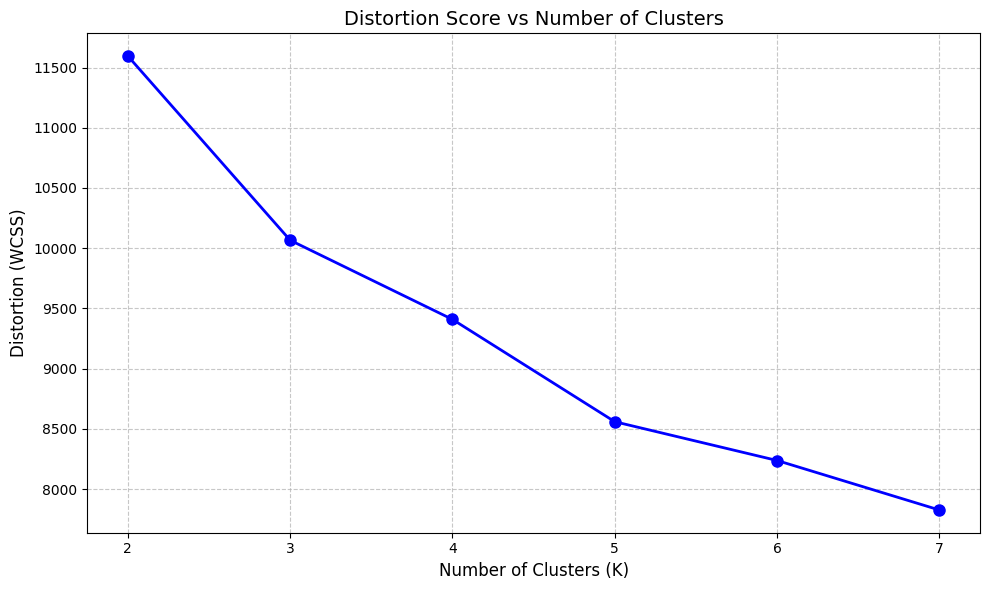

In [9]:
# Q 1.3
import matplotlib.pyplot as plt

# Plot the distortion (inertia) curve
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertias, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('Distortion (WCSS)', fontsize=12)
plt.title('Distortion Score vs Number of Clusters', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(k_values)  # Force x-axis to show all K values
plt.tight_layout()
plt.show()

In [ ]:
"""
Based on the elbow curve, K=3 would be the optimal choice because:
    1. The rate of decrease in distortion becomes notably more gradual after K=3
    2. While higher K values continue to decrease distortion, they risk overfitting
    3. The data naturally suggests two main classes (malignant/benign), so K=3 allows for reasonable subgrouping while avoiding excessive complexity
"""